In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def is_spam(x):
    if x.find('I am Victoriya') != -1:
        return True
    if x.find('seach for boy-friend') != -1:
        return True
    if x.find('Ny photos') != -1:
        return True
    
    return False

In [58]:
is_spam('I am Victoriya, I am 27 y.o.')

True

In [59]:
st = 'a bc def'
st.find('abc')

-1

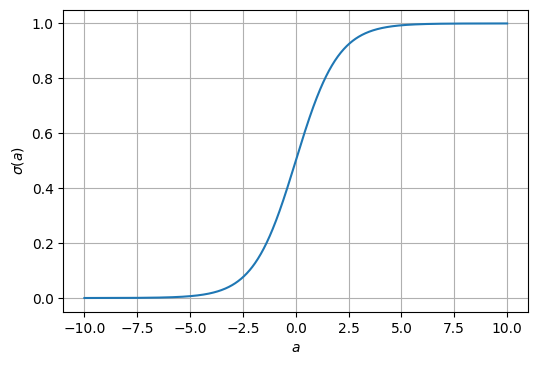

In [60]:
fig, ax = plt.subplots(dpi=100)
x = np.linspace(-10, 10, 1000)
ax.plot(x, 1 / (1+np.exp(-x)))
ax.set_xlabel('$a$')
ax.set_ylabel('$\sigma(a)$')
ax.grid()
plt.show()

In [61]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [62]:
sigmoid(0)

0.5

In [63]:
sigmoid(3), sigmoid(-3)

(0.9525741268224334, 0.04742587317756678)

In [64]:
sigmoid(-1000.)

/var/folders/31/34b84x3d0pq7msq7m4v_8v7r0000gn/T/ipykernel_50444/2796829206.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


0.0

In [65]:
def sigmoid(a):
    if 0 <= a:
        return 1 / (1+np.exp(-1))
    else:
        return 1. - 1 / (1+np.exp(a))

In [66]:
sigmoid(-10000.)

0.0

In [67]:
import collections

def tokenize(s):
    return [t.rstrip('.') for t in s.split(' ')]

def vectorize(tokens):
    return collections.Counter(tokens)

def readiter(fi):
    for line in fi:
        fields = line.strip('\n').split('\t')
        x = vectorize(tokenize(fields[1]))
        y = fields[0]
        yield x, y

with open("SMSSpamCollection") as fi:
    D = [d for d in readiter(fi)]

In [68]:
D[13]

(Counter({"I've": 1,
          'been': 2,
          'searching': 1,
          'for': 3,
          'the': 1,
          'right': 1,
          'words': 1,
          'to': 1,
          'thank': 1,
          'you': 1,
          'this': 1,
          'breather': 1,
          'I': 1,
          'promise': 2,
          'i': 1,
          'wont': 1,
          'take': 1,
          'your': 1,
          'help': 1,
          'granted': 1,
          'and': 2,
          'will': 1,
          'fulfil': 1,
          'my': 1,
          'You': 1,
          'have': 1,
          'wonderful': 1,
          'a': 1,
          'blessing': 1,
          'at': 1,
          'all': 1,
          'times': 1}),
 'ham')

In [69]:
from sklearn.model_selection import train_test_split

Dtrain, Dtest = train_test_split(D, test_size=0.1, random_state=0)

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

VX = DictVectorizer()
VY = LabelEncoder()

Xtrain = VX.fit_transform([d[0] for d in Dtrain])
Ytrain = VY.fit_transform([d[1] for d in Dtrain])
Xtest = VX.transform([d[0] for d in Dtest])
Ytest = VY.transform([d[1] for d in Dtest])

In [71]:
Dtrain[10]

(Counter({'I': 1,
          'take': 1,
          'it': 2,
          'we': 3,
          "didn't": 1,
          'have': 2,
          'the': 1,
          'phone': 1,
          'callon': 1,
          'Friday': 1,
          'Can': 1,
          'assume': 1,
          "won't": 1,
          'this': 1,
          'year': 1,
          'now?': 1}),
 'ham')

In [72]:
print(Xtrain[10])

  (0, 1831)	1.0
  (0, 2385)	1.0
  (0, 2769)	1.0
  (0, 5546)	1.0
  (0, 6110)	1.0
  (0, 6923)	1.0
  (0, 8101)	2.0
  (0, 8587)	2.0
  (0, 9821)	1.0
  (0, 10231)	1.0
  (0, 11832)	1.0
  (0, 11957)	1.0
  (0, 12014)	1.0
  (0, 12653)	3.0
  (0, 12862)	1.0
  (0, 13030)	1.0


In [73]:
VX.feature_names_[1831]

'Can'

In [74]:
print(Ytrain[10])

0


In [75]:
VY.classes_

array(['ham', 'spam'], dtype='<U4')

In [76]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log_loss')
model.fit(Xtrain, Ytrain)

SGDClassifier(loss='log_loss')

In [77]:
model.predict(Xtest[0])

array([0])

In [78]:
model.predict_proba(Xtest[0])

array([[0.99731589, 0.00268411]])

In [79]:
model.score(Xtest, Ytest)

0.967741935483871

In [80]:
msg = "Your account has been credited with 500 FREE Text Messages."
model.predict_proba(VX.transform(vectorize(tokenize(msg))))

array([[0.31757836, 0.68242164]])

In [81]:
print(VX.transform(vectorize(tokenize(msg))))

  (0, 997)	1.0
  (0, 2296)	1.0
  (0, 3338)	1.0
  (0, 4549)	1.0
  (0, 5114)	1.0
  (0, 5182)	1.0
  (0, 5746)	1.0
  (0, 6652)	1.0
  (0, 8088)	1.0
  (0, 12828)	1.0


In [82]:
model.predict(VX.transform(vectorize(tokenize(msg))))

array([1])

In [83]:
model.coef_

array([[-0.87062814, -0.26195068, -0.0052404 , ...,  0.29360703,
        -0.068845  , -0.00110501]])

In [84]:
F = sorted(zip(VX.feature_names_, model.coef_[0]), key=lambda x: x[1])

In [85]:
F[:20]

[('him', -1.2410065421822043),
 ('me', -1.1449585592375209),
 ('I', -1.096709843723779),
 ('simple', -1.0876402265123755),
 ("I'll", -1.0011449623924031),
 ('&amp;', -0.9992988048724901),
 ('Happy', -0.9867559741583719),
 ('Yes', -0.9804875439887741),
 ('&lt;#&gt;', -0.9646755960810582),
 ('i', -0.9637478687647103),
 ('bring', -0.9313985311267506),
 ('Lol', -0.900409025460171),
 ('what', -0.8907027643421462),
 ('And', -0.8842573322135856),
 ('my', -0.8773147121570536),
 ('', -0.8706281382727308),
 (':)', -0.8551905003035479),
 ('that', -0.824483489612856),
 ('My', -0.8217900174041202),
 ('ask', -0.8057721887142808)]

In [86]:
import numpy as np


class LogisticClassifier():
    
    def __init__(self):
        self.w = None
    
    def sigmoid(self, a):
        # refer 5.3.1
        return (0 <= a) * (1 / (1 + np.exp(-a))) + (0 > a) * (1. - 1 / (1 + np.exp(a)))
    
    def train(self, X, Y, eta=1.0, alpha=1e-6, epoch=40000, eps=1e-6):
        N = X.shape[0]
        self.w = np.random.uniform(size=(X.shape[-1], 1))
        for t in range(epoch):
            i = np.random.choice(N)
            delta = (Y[i] - self.predict_proba(X[i])) * X[i]
            delta = delta.reshape((-1, 1)) - 2 * alpha * self.w / N
            if np.sum(np.abs(delta)) < eps:
                break
            self.w += eta * delta
        return self
    
    def predict_proba(self, X):
        y = self.sigmoid(X @ self.w)
        return y.flatten()

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [87]:
np.random.uniform(low=1, high=3)

1.8670276962649746

<AxesSubplot:xlabel='x'>

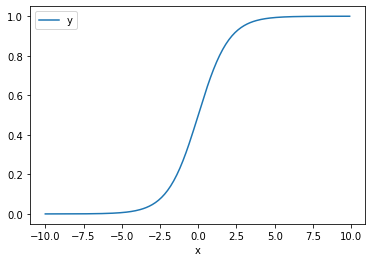

In [88]:
import pandas as pd

pd.DataFrame({
    "x":np.arange(-10, 10, 0.1),
    "y":LogisticClassifier().sigmoid(np.arange(-10, 10, 0.1))
}).plot.line(x='x', y='y')

In [89]:
def test_train():
    X = np.array([[1.0, 0.0, 0.0], [0.0, 0.1, 0.], [1.0, 0.0, 0.0]])
    y = np.array([1, 0, 1])
    model = LogisticClassifier().train(X, y, eps=0)
    np.testing.assert_allclose(y, model.predict_proba(X), atol=0.01)

test_train()

In [97]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer


class Converter():
    
    def __init__(self):
        self.vectorizer = None
        self.encoder = None

    def tokenize(self, text):
        return [s.rstrip('.') for s in text.split(' ')]

    def to_dict(self, tokens):
        return Counter(tokens)

    def read_file(self, file_name):
        dataset = []
        with open(file_name) as f:
            for line in f.readlines():
                fields = line.strip('\n').split('\t')
                y = fields[0]
                x = self.to_dict(self.tokenize(fields[1]))
                dataset.append((x, y))
        return dataset
    
    def fit_transform(self, dataset):
        self.vectorizer = DictVectorizer()
        self.encoder = LabelEncoder()
        X = self.vectorizer.fit_transform([d[0] for d in dataset])
        y = self.encoder.fit_transform([d[1] for d in dataset])
        return X, y
    
    def transform(self, dataset):
        X = self.vectorizer.transform([d[0] for d in dataset])
        y = self.encoder.transform([d[1] for d in dataset])
        return X, y   

In [99]:
converter = Converter()
dataset = converter.read_file('SMSSpamCollection')


In [100]:
from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(dataset, test_size=0.1, random_state=0)

In [101]:
len(trainData), len(testData)

(5016, 558)

In [102]:
X, y = converter.fit_transform(trainData)

In [104]:
model = LogisticClassifier().train(X, y, eta=1.0, alpha=1e-6, epoch=100000, eps=1e-6)

In [105]:
Xtest, ytest = converter.transform(testData)

In [107]:
from sklearn.metrics import classification_report

print(classification_report(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       469
           1       0.88      0.87      0.87        89

    accuracy                           0.96       558
   macro avg       0.92      0.92      0.92       558
weighted avg       0.96      0.96      0.96       558



In [110]:
weight = pd.Series(model.w.flatten(), index=converter.vectorizer.feature_names_)

In [112]:
weight.nlargest(20)

Txt            8.259487
txt            6.929548
let's          6.768294
Luv            6.308502
sexy           5.723937
FREE           5.566591
Text           5.241073
won            5.223087
truly          5.202239
claim          5.024960
STOP           4.937241
mobile         4.926765
won't          4.905244
UK             4.878080
£1.50          4.844335
who            4.811693
07090201529    4.751420
Call           4.728915
&              4.621889
Reply          4.581355
dtype: float64

In [113]:
weight.nsmallest(20)

face        -9.569009
Ok          -6.630428
d           -6.528781
Its         -5.911310
me          -5.467888
&lt;#&gt;   -5.065730
But         -5.033706
Yup         -5.016504
Okie        -4.793286
No          -4.753414
Where       -4.648143
my          -4.644060
            -4.629090
Happy       -4.599789
I'll        -4.542323
I           -4.514865
i           -4.496601
So          -4.432924
that        -4.367934
got         -4.329459
dtype: float64